# Gameplay Episode Data Analysis

This notebook provides exploratory data analysis (EDA) for gameplay recordings captured with the Siphon pipeline.


In [3]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Dict, List

# Set plotting style
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Recording Data

Load a single episode or multiple episodes for analysis.


In [6]:
## 1. Load Recording Data
recording_path = "../recordings/episode_0001_cond0_rec_1762506445978_2932_1762506528.h5"

h5_file = h5py.File(recording_path, 'r')
print(f"Loaded: {recording_path}")
print(f"File size: {Path(recording_path).stat().st_size / 1024 / 1024:.2f} MB")

Loaded: ../recordings/episode_0001_cond0_rec_1762506445978_2932_1762506528.h5
File size: 2526.82 MB


In [7]:
# Explore the H5 file structure
print("Top-level keys:")
for key in h5_file.keys():
    dataset = h5_file[key]
    print(f"  {key}: shape={dataset.shape}, dtype={dataset.dtype}")
    
# Check for metadata attributes
print("\nFile metadata:")
for attr_name, attr_value in h5_file.attrs.items():
    print(f"  {attr_name}: {attr_value}")

Top-level keys:
  frames: shape=(801, 999, 1684, 4), dtype=uint8
  inputs: shape=(801, 300), dtype=uint8
  latencies: shape=(801, 5), dtype=float32
  memory_data: shape=(801, 19), dtype=float32
  timestamps: shape=(801,), dtype=int64

File metadata:


In [9]:
# Extract memory data (game attributes)
memory_data = h5_file['memory_data'][:]
timestamps = h5_file['timestamps'][:]

# Get attribute names from metadata
if 'attribute_names' in h5_file['memory_data'].attrs:
    attribute_names = h5_file['memory_data'].attrs['attribute_names']
    if isinstance(attribute_names[0], bytes):
        attribute_names = [name.decode('utf-8') for name in attribute_names]
else:
    # Fallback: try to infer from shape
    attribute_names = [f"Attr_{i}" for i in range(memory_data.shape[1])]

print(f"Recording info:")
print(f"  Total frames: {len(memory_data)}")
print(f"  Attributes tracked: {len(attribute_names)}")
print(f"  Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")
print(f"  Average FPS: {len(timestamps) / (timestamps[-1] - timestamps[0]):.2f}")

print(f"\nAttributes: {', '.join(attribute_names)}")


Recording info:
  Total frames: 801
  Attributes tracked: 19
  Duration: 82001.00 seconds
  Average FPS: 0.01

Attributes: HeroHp, HeroMaxHp, HeroSp, HeroMaxSp, HeroFp, HeroMaxFp, HeroGlobalPosX, HeroGlobalPosY, HeroGlobalPosZ, HeroAngle, HeroAnimId, NpcHp, NpcMaxHp, NpcId, NpcGlobalPosX, NpcGlobalPosY, NpcGlobalPosZ, NpcGlobalPosAngle, NpcAnimId


In [10]:
# Create a DataFrame for easier analysis
df = pd.DataFrame(memory_data, columns=attribute_names)
df['timestamp'] = timestamps
df['frame'] = range(len(df))
df['time_elapsed'] = df['timestamp'] - df['timestamp'].iloc[0]

print("DataFrame preview:")
df.head(10)


DataFrame preview:


,HeroHp,HeroMaxHp,HeroSp,HeroMaxSp,HeroFp,HeroMaxFp,HeroGlobalPosX,HeroGlobalPosY,HeroGlobalPosZ,HeroAngle,...,NpcMaxHp,NpcId,NpcGlobalPosX,NpcGlobalPosY,NpcGlobalPosZ,NpcGlobalPosAngle,NpcAnimId,timestamp,frame,time_elapsed
0,2226.0,2226.0,96.0,96.0,78.0,78.0,18.838318,-11.872107,-7.051833,1.318176,...,4174.0,213000.0,-44.908623,-17.104744,4.662684,1.0,2003017.0,1762506446001,0,0
1,2226.0,2226.0,68.0,96.0,78.0,78.0,0.099184,-16.079638,-4.353381,0.623367,...,4174.0,213000.0,-44.990059,-17.156380,4.673031,1.0,2003017.0,1762506450138,1,4137
2,2226.0,2226.0,67.0,96.0,78.0,78.0,-0.258491,-16.578665,-4.242437,0.619752,...,4174.0,213000.0,-13.040069,-1.099336,4.677601,1.0,2003017.0,1762506450242,2,4241
3,2226.0,2226.0,66.0,96.0,78.0,78.0,-0.573011,-17.097792,-4.120751,0.618426,...,4174.0,213000.0,-13.012786,-1.032965,4.674993,1.0,2003017.0,1762506450347,3,4346
4,2226.0,2226.0,65.0,96.0,78.0,78.0,-0.757077,-17.229294,-4.107117,2.191118,...,4174.0,213000.0,-12.721410,-1.134990,4.641891,1.0,2003017.0,1762506450453,4,4452
5,2226.0,2226.0,66.0,96.0,78.0,78.0,-0.897285,-17.160929,-4.118234,1.580815,...,4174.0,213000.0,-12.512354,-1.101548,4.627391,1.0,2003017.0,1762506450543,5,4542
6,2226.0,2226.0,70.0,96.0,78.0,78.0,-1.105806,-16.972174,-4.163806,2.227552,...,4174.0,213000.0,-12.441525,-0.442280,4.639489,1.0,2003017.0,1762506450646,6,4645
7,2226.0,2226.0,59.0,96.0,78.0,78.0,-1.405079,-16.636068,-4.204008,2.227552,...,4174.0,213000.0,-12.228769,-0.798992,4.605734,1.0,2003017.0,1762506450743,7,4742
8,2226.0,2226.0,59.0,96.0,78.0,78.0,-1.965794,-16.184660,-4.253680,2.227552,...,4174.0,213000.0,-12.100711,-1.154678,4.601802,1.0,2003017.0,1762506450837,8,4836
9,2226.0,2226.0,59.0,96.0,78.0,78.0,-2.684137,-15.595456,-4.167113,2.227552,...,4174.0,213000.0,-12.146015,-1.188084,4.605253,1.0,2003017.0,1762506450936,9,4935


## 3. Statistical Summary


In [11]:
# Statistical summary of all attributes
df[attribute_names].describe()


,HeroHp,HeroMaxHp,HeroSp,HeroMaxSp,HeroFp,HeroMaxFp,HeroGlobalPosX,HeroGlobalPosY,HeroGlobalPosZ,HeroAngle,HeroAnimId,NpcHp,NpcMaxHp,NpcId,NpcGlobalPosX,NpcGlobalPosY,NpcGlobalPosZ,NpcGlobalPosAngle,NpcAnimId
count,801.000000,801.0,801.000000,801.0,801.0,801.0,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,801.0,801.000
mean,1157.538086,2226.0,68.355804,96.0,78.0,78.0,3.837946,-14.313640,-5.127490,-0.303213,6835496.0,3160.656738,4174.0,212999.984375,5.883618,2.266583,3.025414,1.0,1914998.250
std,578.772644,0.0,25.946812,0.0,0.0,0.0,6.450146,3.562584,2.693486,1.772460,10433628.0,525.255188,0.0,0.000000,7.438955,3.247843,1.227746,0.0,406783.375
min,0.000000,2226.0,-10.000000,96.0,78.0,78.0,-7.057789,-21.791952,-35.099258,-2.927830,5101.0,2311.000000,4174.0,213000.000000,-44.990059,-17.156380,1.009261,1.0,41000.000
25%,608.000000,2226.0,51.000000,96.0,78.0,78.0,-2.106743,-16.830448,-5.420908,-1.896524,27100.0,2806.000000,4174.0,213000.000000,2.154880,-0.301428,2.352647,1.0,2003006.000
50%,974.000000,2226.0,72.000000,96.0,78.0,78.0,3.260321,-14.671277,-4.796432,-1.240602,2020100.0,3152.000000,4174.0,213000.000000,5.520082,2.821174,2.958974,1.0,2003012.000
75%,1677.000000,2226.0,93.000000,96.0,78.0,78.0,8.707385,-11.872527,-4.087517,1.521491,2202020.0,3459.000000,4174.0,213000.000000,11.946627,4.510420,3.824481,1.0,2003025.000
max,2226.000000,2226.0,96.000000,96.0,78.0,78.0,18.838318,-1.745531,-2.206241,3.130631,25031272.0,4174.000000,4174.0,213000.000000,17.792356,8.912332,8.564275,1.0,2009500.000


## 4. Health & Resource Visualization

Visualize player health, stamina, FP, and enemy health over time.


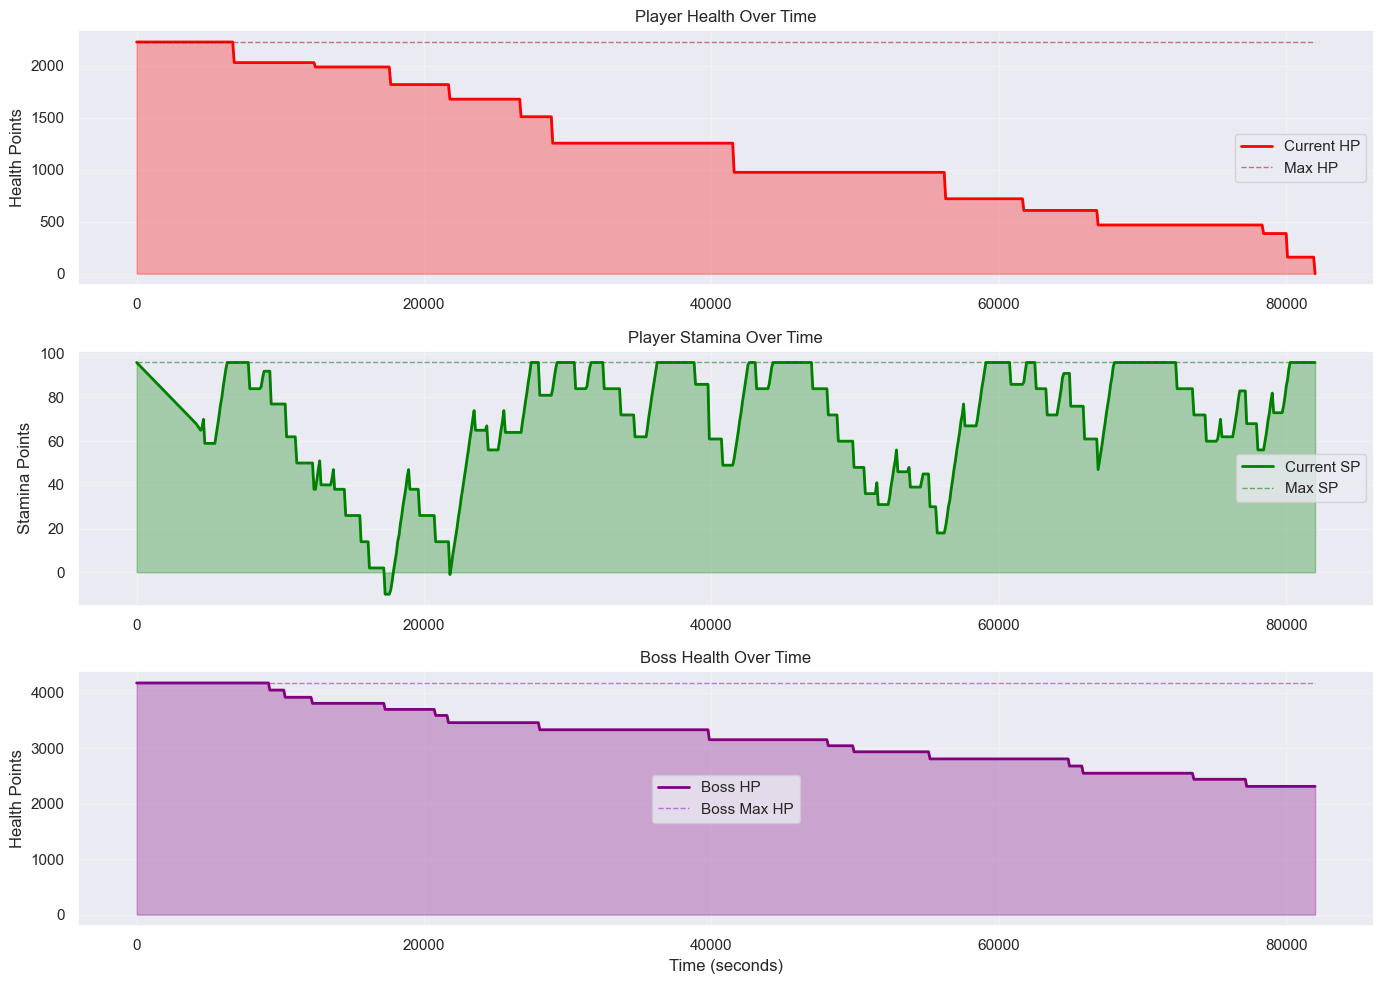

In [12]:
# Plot health and resources over time
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Player Health
if 'HeroHp' in df.columns and 'HeroMaxHp' in df.columns:
    axes[0].plot(df['time_elapsed'], df['HeroHp'], label='Current HP', linewidth=2, color='red')
    axes[0].plot(df['time_elapsed'], df['HeroMaxHp'], label='Max HP', linewidth=1, linestyle='--', color='darkred', alpha=0.5)
    axes[0].fill_between(df['time_elapsed'], 0, df['HeroHp'], alpha=0.3, color='red')
    axes[0].set_ylabel('Health Points')
    axes[0].set_title('Player Health Over Time')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

# Player Stamina
if 'HeroSp' in df.columns and 'HeroMaxSp' in df.columns:
    axes[1].plot(df['time_elapsed'], df['HeroSp'], label='Current SP', linewidth=2, color='green')
    axes[1].plot(df['time_elapsed'], df['HeroMaxSp'], label='Max SP', linewidth=1, linestyle='--', color='darkgreen', alpha=0.5)
    axes[1].fill_between(df['time_elapsed'], 0, df['HeroSp'], alpha=0.3, color='green')
    axes[1].set_ylabel('Stamina Points')
    axes[1].set_title('Player Stamina Over Time')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

# Enemy Health (if available)
if 'NpcHp' in df.columns and 'NpcMaxHp' in df.columns:
    axes[2].plot(df['time_elapsed'], df['NpcHp'], label='Boss HP', linewidth=2, color='purple')
    axes[2].plot(df['time_elapsed'], df['NpcMaxHp'], label='Boss Max HP', linewidth=1, linestyle='--', color='darkviolet', alpha=0.5)
    axes[2].fill_between(df['time_elapsed'], 0, df['NpcHp'], alpha=0.3, color='purple')
    axes[2].set_ylabel('Health Points')
    axes[2].set_title('Boss Health Over Time')
    axes[2].set_xlabel('Time (seconds)')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Position & Movement Analysis

Analyze player and enemy positions and movement patterns.


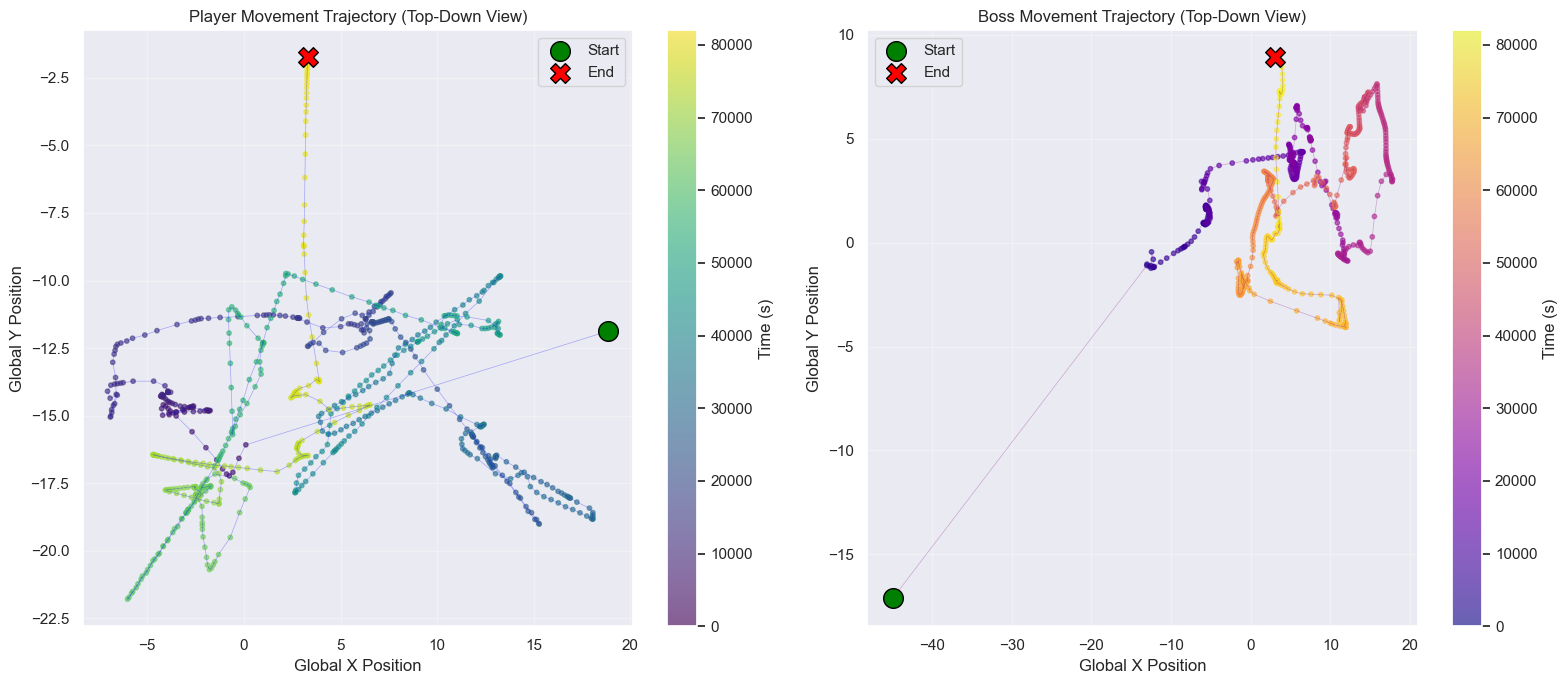

In [14]:
# Plot 2D movement (X-Y plane, top-down view)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Player movement trajectory
if all(col in df.columns for col in ['HeroGlobalPosX', 'HeroGlobalPosY']):
    scatter = axes[0].scatter(df['HeroGlobalPosX'], df['HeroGlobalPosY'], 
                              c=df['time_elapsed'], cmap='viridis', 
                              s=10, alpha=0.6)
    axes[0].plot(df['HeroGlobalPosX'], df['HeroGlobalPosY'], 
                 linewidth=0.5, alpha=0.3, color='blue')
    axes[0].set_xlabel('Global X Position')
    axes[0].set_ylabel('Global Y Position')
    axes[0].set_title('Player Movement Trajectory (Top-Down View)')
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0], label='Time (s)')
    
    # Mark start and end
    axes[0].scatter(df['HeroGlobalPosX'].iloc[0], df['HeroGlobalPosY'].iloc[0], 
                    color='green', s=200, marker='o', label='Start', zorder=5, edgecolors='black')
    axes[0].scatter(df['HeroGlobalPosX'].iloc[-1], df['HeroGlobalPosY'].iloc[-1], 
                    color='red', s=200, marker='X', label='End', zorder=5, edgecolors='black')
    axes[0].legend()

# Boss position (if available)
if all(col in df.columns for col in ['NpcGlobalPosX', 'NpcGlobalPosY']):
    scatter2 = axes[1].scatter(df['NpcGlobalPosX'], df['NpcGlobalPosY'], 
                               c=df['time_elapsed'], cmap='plasma', 
                               s=10, alpha=0.6)
    axes[1].plot(df['NpcGlobalPosX'], df['NpcGlobalPosY'], 
                 linewidth=0.5, alpha=0.3, color='purple')
    axes[1].set_xlabel('Global X Position')
    axes[1].set_ylabel('Global Y Position')
    axes[1].set_title('Boss Movement Trajectory (Top-Down View)')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1], label='Time (s)')
    
    # Mark start and end
    axes[1].scatter(df['NpcGlobalPosX'].iloc[0], df['NpcGlobalPosY'].iloc[0], 
                    color='green', s=200, marker='o', label='Start', zorder=5, edgecolors='black')
    axes[1].scatter(df['NpcGlobalPosX'].iloc[-1], df['NpcGlobalPosY'].iloc[-1], 
                    color='red', s=200, marker='X', label='End', zorder=5, edgecolors='black')
    axes[1].legend()

plt.tight_layout()
plt.show()


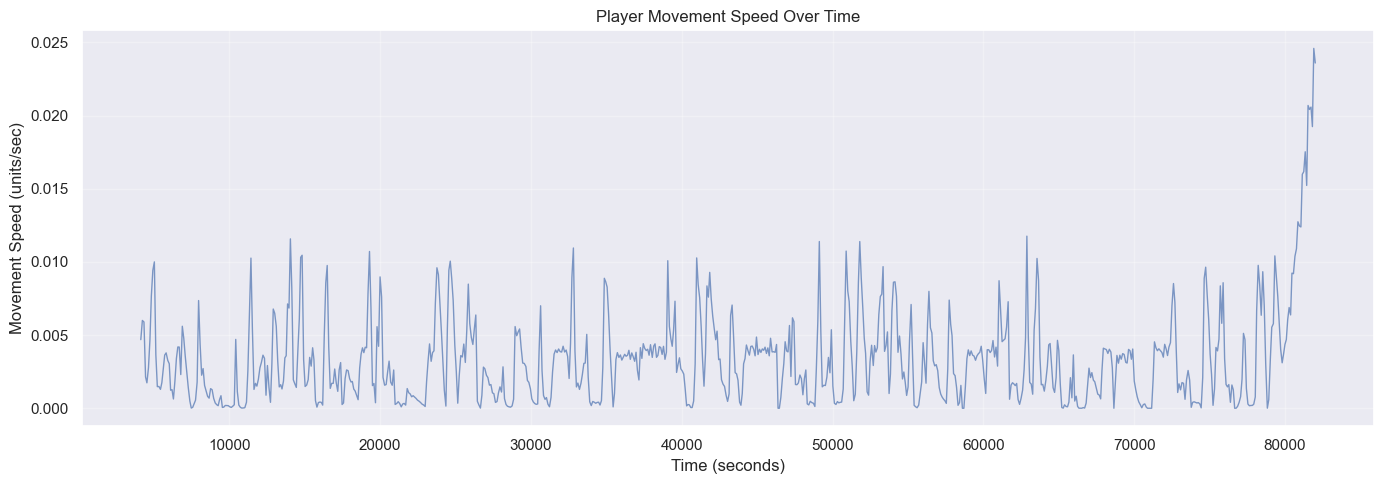

Average speed: 0.00 units/sec
Max speed: 0.02 units/sec


In [15]:
# Calculate movement speed
if all(col in df.columns for col in ['HeroGlobalPosX', 'HeroGlobalPosY', 'HeroGlobalPosZ']):
    df['hero_velocity'] = np.sqrt(
        df['HeroGlobalPosX'].diff()**2 + 
        df['HeroGlobalPosY'].diff()**2 + 
        df['HeroGlobalPosZ'].diff()**2
    ) / df['timestamp'].diff()
    
    plt.figure(figsize=(14, 5))
    plt.plot(df['time_elapsed'], df['hero_velocity'], linewidth=1, alpha=0.7)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Movement Speed (units/sec)')
    plt.title('Player Movement Speed Over Time')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Average speed: {df['hero_velocity'].mean():.2f} units/sec")
    print(f"Max speed: {df['hero_velocity'].max():.2f} units/sec")


## 6. Combat Analysis

Analyze damage dealt, health changes, and combat patterns.


Total damage taken: 2226
Number of hits taken: 13
Average damage per hit: 171.23
Max single hit: 280

Total damage dealt to boss: 1863
Number of hits dealt: 15
Average damage per hit: 124.20
Max single hit: 179


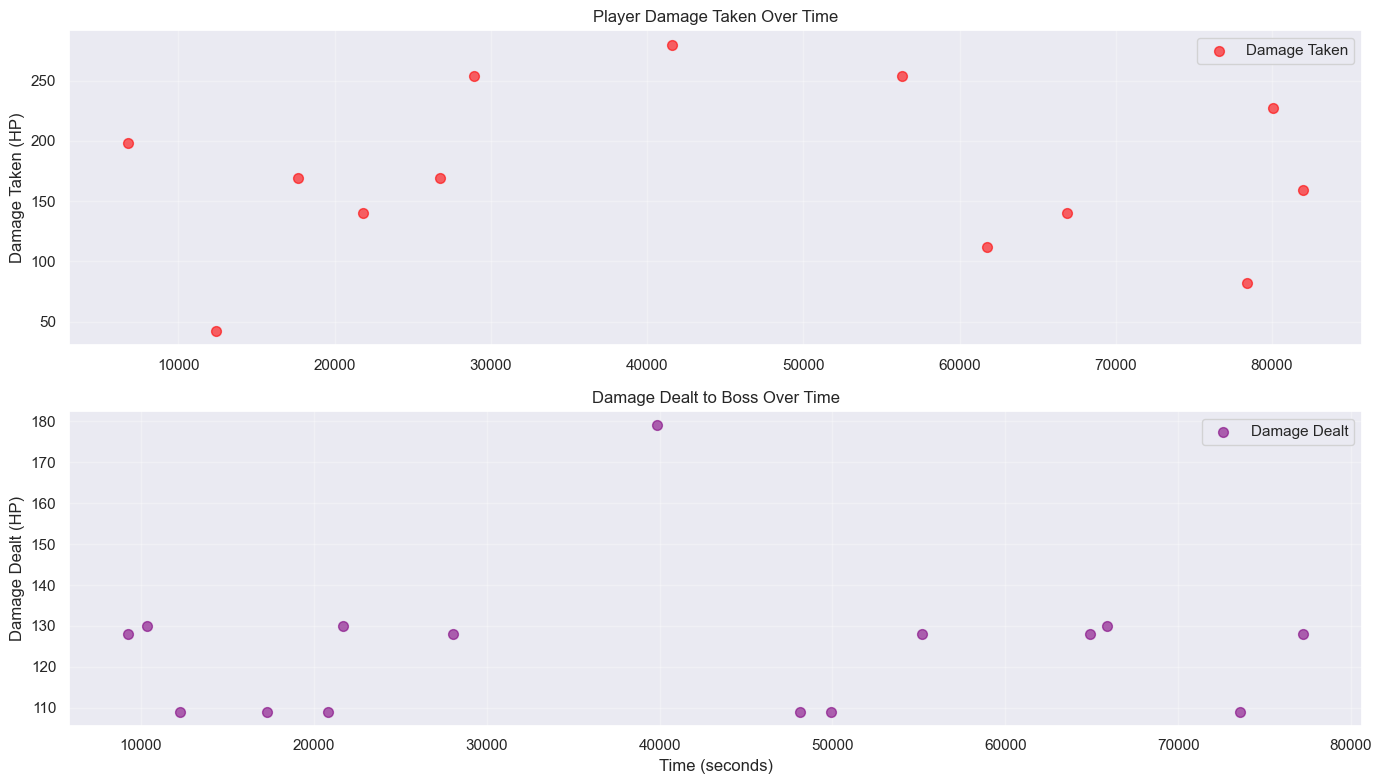

In [16]:
# Calculate damage taken and dealt
if 'HeroHp' in df.columns:
    df['hero_hp_change'] = df['HeroHp'].diff()
    df['hero_damage_taken'] = -df['hero_hp_change'].where(df['hero_hp_change'] < 0, 0)
    
if 'NpcHp' in df.columns:
    df['npc_hp_change'] = df['NpcHp'].diff()
    df['damage_dealt_to_boss'] = -df['npc_hp_change'].where(df['npc_hp_change'] < 0, 0)
    
# Plot damage over time
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

if 'hero_damage_taken' in df.columns:
    damage_frames = df[df['hero_damage_taken'] > 0]
    axes[0].scatter(damage_frames['time_elapsed'], damage_frames['hero_damage_taken'], 
                    color='red', s=50, alpha=0.6, label='Damage Taken')
    axes[0].set_ylabel('Damage Taken (HP)')
    axes[0].set_title('Player Damage Taken Over Time')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    
    print(f"Total damage taken: {df['hero_damage_taken'].sum():.0f}")
    print(f"Number of hits taken: {len(damage_frames)}")
    if len(damage_frames) > 0:
        print(f"Average damage per hit: {df['hero_damage_taken'].sum() / len(damage_frames):.2f}")
        print(f"Max single hit: {df['hero_damage_taken'].max():.0f}")

if 'damage_dealt_to_boss' in df.columns:
    damage_dealt_frames = df[df['damage_dealt_to_boss'] > 0]
    axes[1].scatter(damage_dealt_frames['time_elapsed'], damage_dealt_frames['damage_dealt_to_boss'], 
                    color='purple', s=50, alpha=0.6, label='Damage Dealt')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('Damage Dealt (HP)')
    axes[1].set_title('Damage Dealt to Boss Over Time')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    print(f"\nTotal damage dealt to boss: {df['damage_dealt_to_boss'].sum():.0f}")
    print(f"Number of hits dealt: {len(damage_dealt_frames)}")
    if len(damage_dealt_frames) > 0:
        print(f"Average damage per hit: {df['damage_dealt_to_boss'].sum() / len(damage_dealt_frames):.2f}")
        print(f"Max single hit: {df['damage_dealt_to_boss'].max():.0f}")

plt.tight_layout()
plt.show()


## 7. Animation Analysis

Track animation IDs to understand player actions and boss attack patterns.


Total unique player animations: 39
Total animation changes: 109

Top 10 most common player animations:
HeroAnimId
2020100.0     126
27100.0       111
25030300.0     87
27101.0        66
2020101.0      52
25030000.0     51
25030010.0     32
27507.0        25
2202020.0      20
5202.0         18
Name: count, dtype: int64


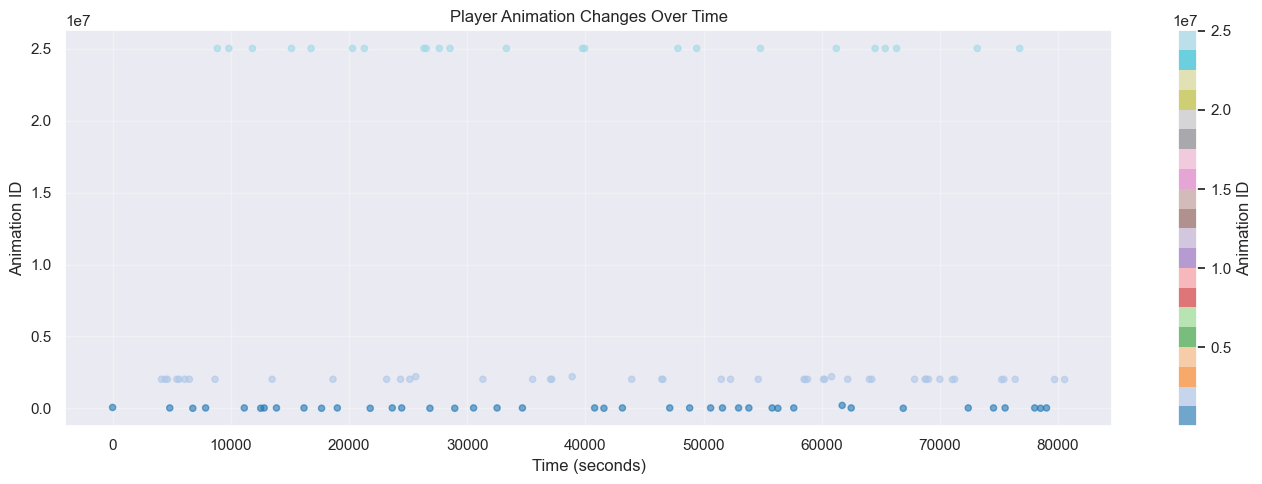

In [17]:
# Analyze player animations
if 'HeroAnimId' in df.columns:
    # Find when animations change (new action started)
    df['anim_changed'] = df['HeroAnimId'].diff() != 0
    
    # Count unique animations
    unique_anims = df['HeroAnimId'].value_counts()
    
    print(f"Total unique player animations: {len(unique_anims)}")
    print(f"Total animation changes: {df['anim_changed'].sum()}")
    print(f"\nTop 10 most common player animations:")
    print(unique_anims.head(10))
    
    # Plot animation changes over time
    anim_changes = df[df['anim_changed']]
    plt.figure(figsize=(14, 5))
    plt.scatter(anim_changes['time_elapsed'], anim_changes['HeroAnimId'], 
                alpha=0.6, s=20, c=anim_changes['HeroAnimId'], cmap='tab20')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Animation ID')
    plt.title('Player Animation Changes Over Time')
    plt.colorbar(label='Animation ID')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


Total unique boss animations: 26
Total animation changes: 55

Top 10 most common boss animations:
NpcAnimId
2003008.0    71
2003026.0    57
2003021.0    54
2003029.0    49
2002003.0    45
2002000.0    42
2003006.0    38
2003009.0    37
2003034.0    36
2009000.0    34
Name: count, dtype: int64


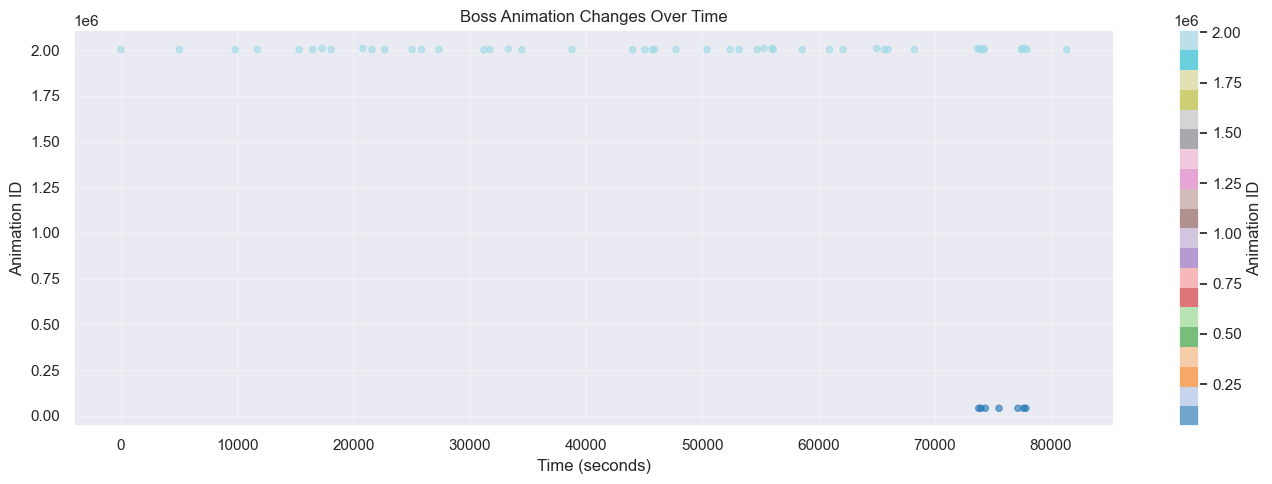

In [18]:
# Analyze boss animations
if 'NpcAnimId' in df.columns:
    # Find when animations change
    df['npc_anim_changed'] = df['NpcAnimId'].diff() != 0
    
    # Count unique animations
    unique_npc_anims = df['NpcAnimId'].value_counts()
    
    print(f"Total unique boss animations: {len(unique_npc_anims)}")
    print(f"Total animation changes: {df['npc_anim_changed'].sum()}")
    print(f"\nTop 10 most common boss animations:")
    print(unique_npc_anims.head(10))
    
    # Plot animation changes over time
    npc_anim_changes = df[df['npc_anim_changed']]
    plt.figure(figsize=(14, 5))
    plt.scatter(npc_anim_changes['time_elapsed'], npc_anim_changes['NpcAnimId'], 
                alpha=0.6, s=20, c=npc_anim_changes['NpcAnimId'], cmap='tab20')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Animation ID')
    plt.title('Boss Animation Changes Over Time')
    plt.colorbar(label='Animation ID')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


## 8. Multi-Episode Comparison

Load and compare multiple episodes to track learning progress.


In [ ]:
# Function to load multiple episodes
def load_episode_summary(file_path):
    """Load summary statistics from an episode recording."""
    with h5py.File(file_path, 'r') as f:
        memory_data = f['memory_data'][:]
        timestamps = f['timestamps'][:]
        
        # Get attribute names
        if 'attribute_names' in f['memory_data'].attrs:
            attr_names = f['memory_data'].attrs['attribute_names']
            if isinstance(attr_names[0], bytes):
                attr_names = [name.decode('utf-8') for name in attr_names]
        else:
            attr_names = [f"Attr_{i}" for i in range(memory_data.shape[1])]
        
        # Create DataFrame
        df_temp = pd.DataFrame(memory_data, columns=attr_names)
        
        # Extract info from filename
        filename = Path(file_path).name
        parts = filename.split('_')
        episode_num = int(parts[1]) if len(parts) > 1 else 0
        
        # Check for condition index
        cond_idx = None
        for part in parts:
            if part.startswith('cond'):
                cond_idx = int(part.replace('cond', ''))
                break
        
        summary = {
            'filename': filename,
            'episode': episode_num,
            'condition_met': cond_idx,
            'duration': timestamps[-1] - timestamps[0],
            'frames': len(timestamps),
            'fps': len(timestamps) / (timestamps[-1] - timestamps[0])
        }
        
        # Add attribute-specific stats
        if 'HeroHp' in df_temp.columns:
            summary['final_hero_hp'] = df_temp['HeroHp'].iloc[-1]
            summary['min_hero_hp'] = df_temp['HeroHp'].min()
            summary['avg_hero_hp'] = df_temp['HeroHp'].mean()
            
        if 'NpcHp' in df_temp.columns:
            summary['final_boss_hp'] = df_temp['NpcHp'].iloc[-1]
            summary['initial_boss_hp'] = df_temp['NpcHp'].iloc[0]
            summary['boss_damage_dealt'] = df_temp['NpcHp'].iloc[0] - df_temp['NpcHp'].iloc[-1]
            
        return summary

# Example: Load all episodes from recordings directory
recordings_dir = Path("./recordings")
if recordings_dir.exists():
    episode_files = sorted(recordings_dir.glob("episode_*.h5"))
    print(f"Found {len(episode_files)} episode recordings")
    
    if len(episode_files) > 0:
        print(f"\\nLoading first 10 episodes for comparison...")
        summaries = []
        for ep_file in episode_files[:10]:  # Limit to first 10 for demo
            try:
                summary = load_episode_summary(ep_file)
                summaries.append(summary)
                print(f"  Loaded: {ep_file.name}")
            except Exception as e:
                print(f"  Error loading {ep_file.name}: {e}")
        
        # Create comparison DataFrame
        if summaries:
            comparison_df = pd.DataFrame(summaries)
            print(f"\\nLoaded {len(comparison_df)} episodes successfully")
            comparison_df
        else:
            print("No episodes loaded successfully")
    else:
        print("No episode files found in ./recordings/")
else:
    print("Recordings directory not found. Skipping multi-episode analysis.")


In [ ]:
# Visualize learning progress across episodes
if 'comparison_df' in locals() and len(comparison_df) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Duration over episodes
    axes[0, 0].plot(comparison_df['episode'], comparison_df['duration'], marker='o', linewidth=2)
    axes[0, 0].set_xlabel('Episode Number')
    axes[0, 0].set_ylabel('Duration (seconds)')
    axes[0, 0].set_title('Episode Duration Over Time')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Boss damage dealt over episodes
    if 'boss_damage_dealt' in comparison_df.columns:
        axes[0, 1].plot(comparison_df['episode'], comparison_df['boss_damage_dealt'], 
                        marker='o', linewidth=2, color='purple')
        axes[0, 1].set_xlabel('Episode Number')
        axes[0, 1].set_ylabel('Damage Dealt to Boss')
        axes[0, 1].set_title('Boss Damage Improvement Over Time')
        axes[0, 1].grid(True, alpha=0.3)
    
    # Condition met (outcome) over episodes
    if 'condition_met' in comparison_df.columns:
        outcome_colors = comparison_df['condition_met'].map({0: 'red', 1: 'green'})
        axes[1, 0].scatter(comparison_df['episode'], comparison_df['condition_met'], 
                          c=outcome_colors, s=100, alpha=0.6)
        axes[1, 0].set_xlabel('Episode Number')
        axes[1, 0].set_ylabel('Stop Condition Index')
        axes[1, 0].set_title('Episode Outcomes (0=Player Died, 1=Boss Died)')
        axes[1, 0].set_yticks([0, 1])
        axes[1, 0].grid(True, alpha=0.3)
    
    # Final player HP over episodes
    if 'final_hero_hp' in comparison_df.columns:
        axes[1, 1].plot(comparison_df['episode'], comparison_df['final_hero_hp'], 
                       marker='o', linewidth=2, color='red')
        axes[1, 1].set_xlabel('Episode Number')
        axes[1, 1].set_ylabel('Final Player HP')
        axes[1, 1].set_title('Player Survival (Final HP)')
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\\n" + "="*60)
    print("MULTI-EPISODE SUMMARY")
    print("="*60)
    if 'condition_met' in comparison_df.columns:
        wins = (comparison_df['condition_met'] == 1).sum()
        losses = (comparison_df['condition_met'] == 0).sum()
        print(f"Win rate: {wins}/{len(comparison_df)} ({wins/len(comparison_df)*100:.1f}%)")
    print(f"Average episode duration: {comparison_df['duration'].mean():.2f}s")
    if 'boss_damage_dealt' in comparison_df.columns:
        print(f"Average damage to boss: {comparison_df['boss_damage_dealt'].mean():.0f}")
        print(f"Best damage to boss: {comparison_df['boss_damage_dealt'].max():.0f}")


## 9. Export Analysis Results

Export processed data and statistics for further analysis or ML training.


In [ ]:
# Export current episode data to CSV for further analysis
output_csv = "episode_analysis.csv"
df.to_csv(output_csv, index=False)
print(f"Exported episode data to {output_csv}")

# Export multi-episode comparison if available
if 'comparison_df' in locals():
    comparison_csv = "episodes_comparison.csv"
    comparison_df.to_csv(comparison_csv, index=False)
    print(f"Exported comparison data to {comparison_csv}")

# Summary statistics
print("\\nDataset Summary:")
print(f"  Total frames: {len(df)}")
print(f"  Duration: {df['time_elapsed'].max():.2f}s")
print(f"  Attributes: {len(attribute_names)}")
print(f"  File processed: {recording_path}")


---

## Notes

This notebook provides comprehensive EDA for Elden Ring gameplay recordings:

- **Section 1-2**: Load and explore recording structure
- **Section 3**: Statistical summaries of all attributes
- **Section 4**: Health, stamina, and resource tracking
- **Section 5**: Movement patterns and trajectory visualization
- **Section 6**: Combat metrics (damage taken/dealt)
- **Section 7**: Animation analysis (player actions and boss attacks)
- **Section 8**: Multi-episode comparison and learning progress
- **Section 9**: Export results for ML training

### Tips for Analysis:

1. **Filter by outcome**: Use `condition_met` to separate wins (cond1) from losses (cond0)
2. **Track improvement**: Plot metrics across episode numbers to see skill progression  
3. **Identify patterns**: Look for correlations between animations and damage events
4. **Optimize strategy**: Compare movement patterns between successful and failed attempts

### For ML Training:

- The exported CSVs contain frame-by-frame data perfect for supervised learning
- Use `condition_met` as labels for classification tasks
- Combine position, health, and animation data as features
- Consider temporal models (RNNs, Transformers) for sequence learning


In [19]:
# Close the H5 file when done
h5_file.close()
print("H5 file closed successfully")


H5 file closed successfully
